## Задача 1. Стохастическая матрица и собственное значение равное 1.



Утверждение.
Пусть дана матрица $А$, в которой элементы неотрицательны и сумма в каждой строке равна $1 .$ Тогда 1 максимальное собственное значение такой матрицы.

Доказательство.
- Возьмём вектор $ \mathrm{v} $ из всех 1 и вычислим $ Av$.
- В силу равенства 1 суммы элементов в каждой строке $ Av$ также будет вектором из всех $1 .$
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках \$а_\{ii\}\$ и радиусом \$1 - а_\{ii\}\$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1

Сгенерируйте случайным образом много таких матриц и для каждой проверьте утверждение. Нарисуйте круги Гершгорина и собственные значения, воспользовавшись программой из документа семинара.

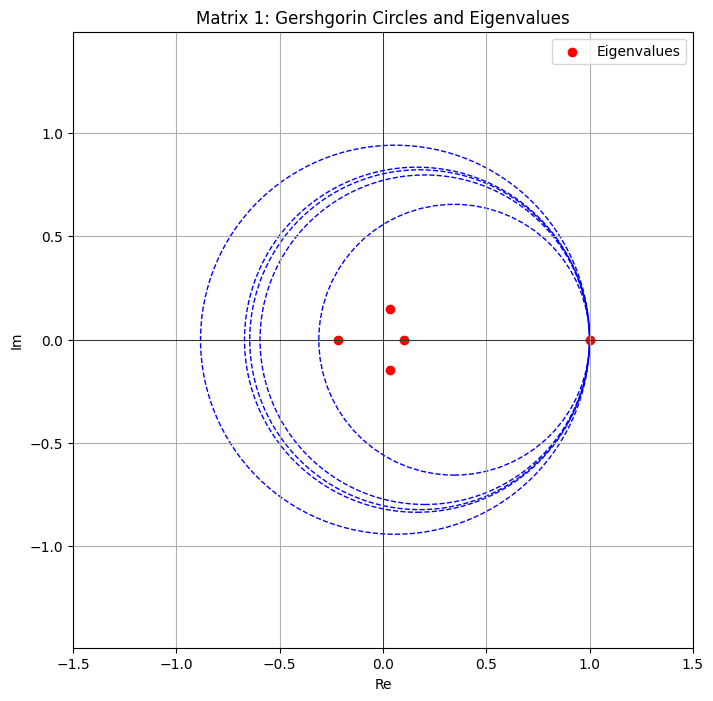

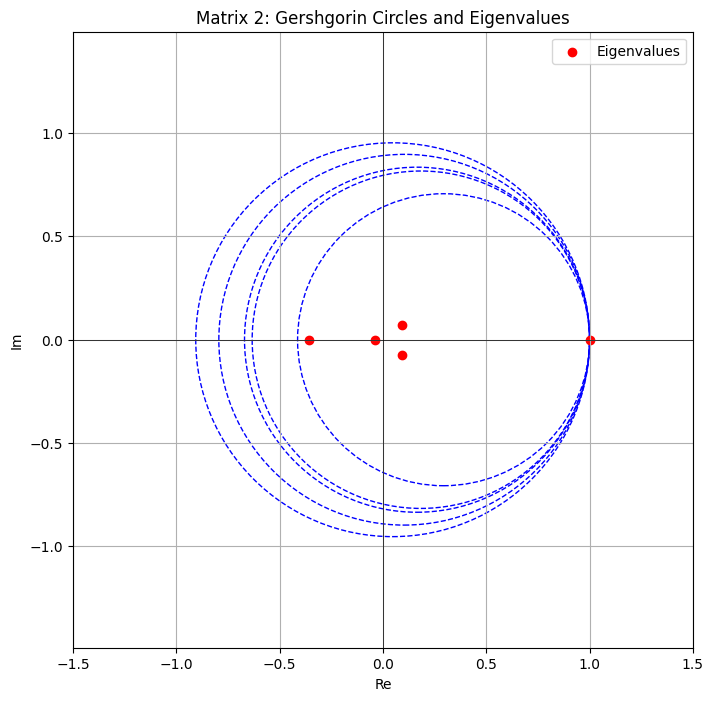

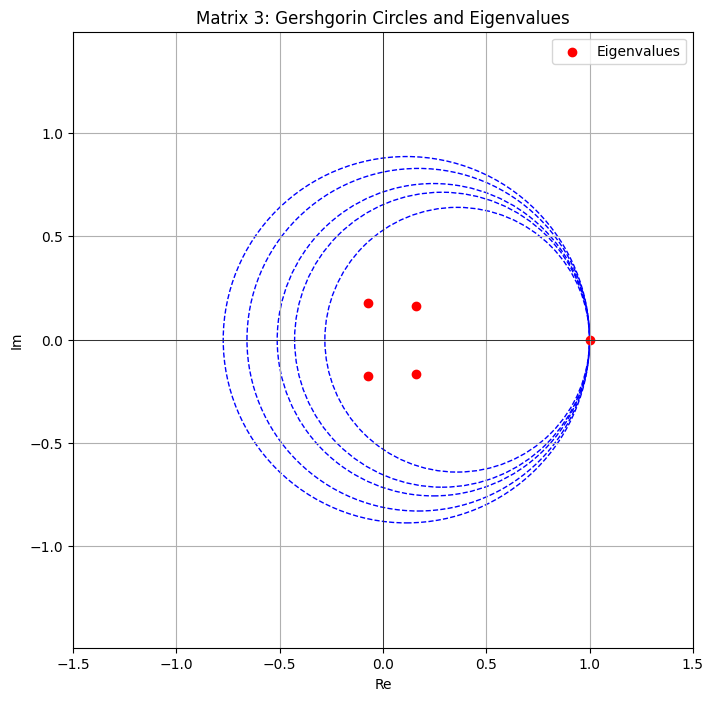

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайной матрицы с неотрицательными элементами и суммой по строкам равной 1
def generate_stochastic_matrix(n):
    A = np.random.rand(n, n)  
    return A / A.sum(axis=1)[:, np.newaxis]  

# Функция для рисования кругов Гершгорина и собственных значений
def plot_gershgorin_and_eigenvalues(A, title=""):
    n = A.shape[0]
    centers = np.diag(A)  
    radii = np.sum(np.abs(A), axis=1) - np.abs(centers)  

    eigenvalues = np.linalg.eigvals(A)  

    
    plt.figure(figsize=(8, 8))
    for i in range(n):
        circle = plt.Circle((centers[i], 0), radii[i], color='b', fill=False, linestyle='--')
        plt.gca().add_artist(circle)
    
    
    plt.scatter(eigenvalues.real, eigenvalues.imag, color='r', label='Eigenvalues')
    plt.axhline(0, color='k',linewidth=0.5)
    plt.axvline(0, color='k',linewidth=0.5)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.title(title)
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.legend()
    plt.grid()
    plt.show()


num_matrices = 3
matrix_size = 5

for i in range(num_matrices):
    A = generate_stochastic_matrix(matrix_size)
    title = f"Matrix {i+1}: Gershgorin Circles and Eigenvalues"
    plot_gershgorin_and_eigenvalues(A, title=title)

#Задача 2.  PageRank и степенные итерации.


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать, что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

In [3]:
import numpy as np


l = np.array([
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=float)

n = l.shape[0]  
L = np.sum(l, axis=0)  

# Строим матрицу G
G = np.zeros_like(l)
for j in range(n):
    if L[j] != 0:
        G[:, j] = l[:, j] / L[j]
    else:  
        G[:, j] = 1 / n

# Добавляем параметр beta и корректировку
beta = 0.8
e = np.ones((n, 1))
G = beta * G + (1 - beta) / n * (e @ e.T)


p = np.ones((n, 1)) / n
tolerance = 1e-4
iterations = 0

while True:
    p_new = G @ p
    if np.linalg.norm(p_new - p, ord=1) < tolerance:
        break
    p = p_new
    iterations += 1


print("PageRank для маленького графа:")
print(p.flatten())
print(f"Количество итераций: {iterations}")
print(f"Наибольший PageRank у узла {np.argmax(p) + 1}")

PageRank для маленького графа:
[0.13808103 0.12714646 0.09981052 0.16806002 0.10742762 0.08916264
 0.0914509  0.06546099 0.05657694 0.05682288]
Количество итераций: 13
Наибольший PageRank у узла 4


In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs


file_path = 'web-Stanford.txt'
edges = pd.read_csv(file_path, comment='#', sep='\t', header=None, names=['from', 'to'])


num_nodes = max(edges['from'].max(), edges['to'].max())

# Создание разреженной матрицы смежности
data = np.ones(len(edges))
row = edges['to'].values - 1  
col = edges['from'].values - 1
adj_matrix = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))

# Построение стохастической матрицы G с учетом dangling nodes
out_degree = np.array(adj_matrix.sum(axis=0)).flatten()
dangling_nodes = out_degree == 0
out_degree[out_degree == 0] = 1  

G = adj_matrix.multiply(1 / out_degree)  
G = G.transpose()

# Добавляем параметр beta и учет переходов на все узлы
beta = 0.8
e = np.ones((num_nodes, 1)) / num_nodes

def pagerank_power_iteration(G, beta=0.8, tol=1e-4, max_iter=100):
    n = G.shape[0]
    p = np.ones((n, 1)) / n
    for iteration in range(max_iter):
        p_new = beta * G @ p + (1 - beta) * e
        if np.linalg.norm(p_new - p, ord=1) < tol:
            return p_new, iteration + 1
        p = p_new
    return p, max_iter


pagerank, num_iter = pagerank_power_iteration(G, beta)


print(f"PageRank рассчитан за {num_iter} итераций.")
print(f"Наибольший PageRank у узла {np.argmax(pagerank) + 1}.")

PageRank рассчитан за 7 итераций.
Наибольший PageRank у узла 169274.


1.	Матрица  G  стохастическая:
	•	Сумма элементов в каждом столбце равна 1.
	2.	Свойство стохастических матриц:
Для любой стохастической матрицы максимальное собственное значение равно 1 (следует из теоремы Перрона-Фробениуса).
	3.	 G  дополнительно корректируется с учетом параметра  \beta , но это не изменяет максимальное собственное значение, так как итоговая матрица остается стохастической.

#Задача 3. Метод обратных итераций и итерации Рэлея.


Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций Рэлея. С её помощью решите задачу для
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение.


Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0)

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

In [4]:
import numpy as np
from scipy.linalg import hilbert, pascal, solve
from scipy.sparse import diags

# Обратные итерации Рэлея для симметричных матриц
def rayleigh_iteration(A, sigma, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)
    
    for _ in range(max_iter):
        
        try:
            y = solve(A - sigma * np.eye(n), x)
        except np.linalg.LinAlgError:
            break
        
        x_new = y / np.linalg.norm(y)
    
        
        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            break
        x = x_new
    
    
    lambda_min = (x.T @ A @ x) / (x.T @ x)
    return lambda_min, x


def find_nearest_eigenvalue(A, sigma):
    return rayleigh_iteration(A, sigma)


def lemer_matrix(n):
    return np.array([[min(i + 1, j + 1) / max(i + 1, j + 1) for j in range(n)] for i in range(n)])


def tridiagonal_matrix(n):
    diagonals = [2 * np.ones(n), -1 * np.ones(n - 1), -1 * np.ones(n - 1)]
    return diags(diagonals, [0, -1, 1]).toarray()

# Вычисления для всех матриц
def solve_for_all_matrices():
    for n in range(2, 11):
        print(f"n = {n}")
        
        # Матрица Гильберта
        H = hilbert(n)
        lambda_min, _ = rayleigh_iteration(H, 0)
        print(f"  Матрица Гильберта: min(lambda) ≈ {lambda_min:.6e}")
        
        # Матрица Лемера
        L = lemer_matrix(n)
        lambda_min, _ = rayleigh_iteration(L, 0)
        print(f"  Матрица Лемера: min(lambda) ≈ {lambda_min:.6e}")
        
        # Матрица Паскаля
        P = pascal(n, kind='symmetric')
        lambda_min, _ = rayleigh_iteration(P, 0)
        print(f"  Матрица Паскаля: min(lambda) ≈ {lambda_min:.6e}")
        
        # Трехдиагональная матрица
        T = tridiagonal_matrix(n)
        lambda_min, _ = rayleigh_iteration(T, 0)
        print(f"  Трехдиагональная матрица: min(lambda) ≈ {lambda_min:.6e}")
        print("-" * 40)


solve_for_all_matrices()

n = 2
  Матрица Гильберта: min(lambda) ≈ 6.574145e-02
  Матрица Лемера: min(lambda) ≈ 5.000000e-01
  Матрица Паскаля: min(lambda) ≈ 3.819660e-01
  Трехдиагональная матрица: min(lambda) ≈ 1.000000e+00
----------------------------------------
n = 3
  Матрица Гильберта: min(lambda) ≈ 2.687340e-03
  Матрица Лемера: min(lambda) ≈ 3.020196e-01
  Матрица Паскаля: min(lambda) ≈ 1.270167e-01
  Трехдиагональная матрица: min(lambda) ≈ 5.857864e-01
----------------------------------------
n = 4
  Матрица Гильберта: min(lambda) ≈ 9.670230e-05
  Матрица Лемера: min(lambda) ≈ 2.077755e-01
  Матрица Паскаля: min(lambda) ≈ 3.801602e-02
  Трехдиагональная матрица: min(lambda) ≈ 3.819660e-01
----------------------------------------
n = 5
  Матрица Гильберта: min(lambda) ≈ 3.287929e-06
  Матрица Лемера: min(lambda) ≈ 1.560195e-01
  Матрица Паскаля: min(lambda) ≈ 1.083536e-02
  Трехдиагональная матрица: min(lambda) ≈ 2.679492e-01
----------------------------------------
n = 6
  Матрица Гильберта: min(lambd

In [5]:
A = hilbert(5)  
sigma = 0.1     
lambda_near, eigenvector = find_nearest_eigenvalue(A, sigma)
print(f"Ближайшее к {sigma} собственное значение: {lambda_near:.6e}")

Ближайшее к 0.1 собственное значение: 1.140749e-02


#Задача 4.  PageRank с помощью библиотек на Python.

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

In [6]:
!pip install networkx

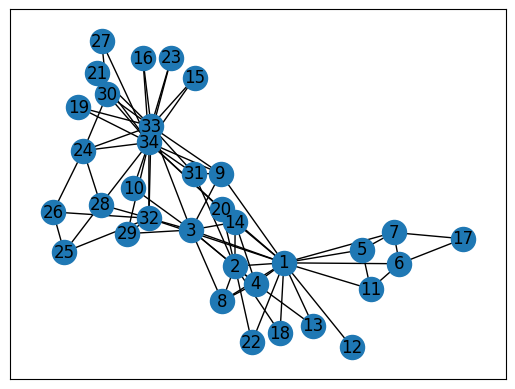

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

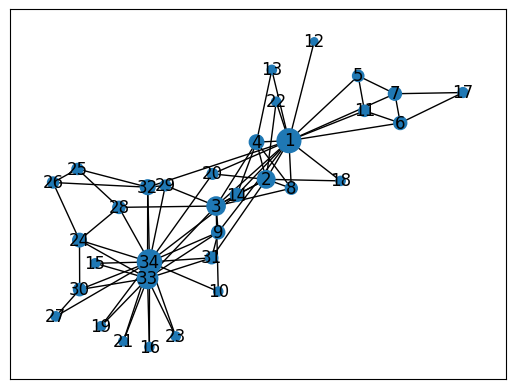

In [9]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


file_path = 'web-Stanford.txt'


G = nx.DiGraph()
i=0

with open(file_path, 'r') as f:
    
    for line in f:
        if(i<5000000):
            if not line.startswith('#'):  
                i=i+1
                
                from_node, to_node = map(int, line.split())
                G.add_edge(from_node, to_node)

print(f"Граф загружен: {G.number_of_nodes()} узлов и {G.number_of_edges()} рёбер.")


pr = nx.algorithms.link_analysis.pagerank(G)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
#nx.draw_networkx(G, node_size=pr_vector, labels=None)

max_pr_node = max(pr, key=pr.get)
print(f"Узел с наибольшим PageRank: {max_pr_node}, значение PageRank: {pr[max_pr_node]:.6f}")

Граф загружен: 281903 узлов и 2312497 рёбер.
Узел с наибольшим PageRank: 89073, значение PageRank: 0.010006


#Задача 5. Матрица вида диагональная матрица плюс матрица малого ранга.

- Собственные значения матрицы вида
$$
D+\rho u u^*
$$
вычислить не так просто!
- Характеристический многочлен имеет вид
$$
\operatorname{det}\left(D+\rho u u^*-\lambda I\right)=\operatorname{det}(D-\lambda I) \operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=0
$$
Тогда (докажите!!)
$$
\operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$
Подсказка: найдите $\operatorname{det}\left(I+w u^*\right)$ используя два факта:
- $\operatorname{det}(C)=\prod_{i=1}^n \lambda_i(C)$
- $\operatorname{trace}(C)=\sum_{i=1}^n \lambda_i$.



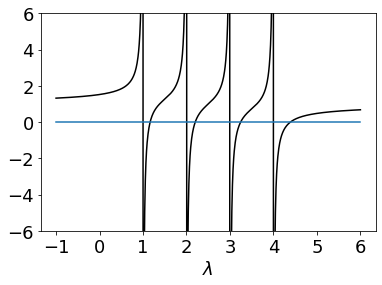

In [ ]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(t, res, 'k')
plt.plot(t, np.zeros_like(t))
plt.ylim([-6, 6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
_ = plt.xlabel("$\lambda$", fontsize=18)

Эта функция имеет только один корень на каждом отрезке $\left[d_i, d_{i+1}\right]$

Мы показали справедливость теоремы Коши о чередовании (что происходит с собственными числами после внесения возмущения ранга 1).

Сформулируйте самостоятельно и докажите эту теорему.

## Доказательство равенства

Докажем, что для матрицы $D + \rho u u^*$ характеристический многочлен имеет вид:

$$
\operatorname{det}\left(I + \rho (D - \lambda I)^{-1} u u^*\right) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda}.
$$

---

### Шаг 1: Свойство определителя матрицы $I + w u^*$

Из линейной алгебры известно, что для матрицы вида $I + w u^*$, где $w \in \mathbb{C}^n$, $u^*$ — транспонированный (или сопряженный) вектор:

$$
\operatorname{det}(I + w u^*) = 1 + \operatorname{trace}(w u^*).
$$

---

### Шаг 2: Применение к $I + \rho (D - \lambda I)^{-1} u u^*$

Заменим $w = \rho (D - \lambda I)^{-1} u$ и $u^*$. Тогда:

$$
\operatorname{det}\left(I + \rho (D - \lambda I)^{-1} u u^*\right) = 1 + \operatorname{trace}\left(\rho (D - \lambda I)^{-1} u u^*\right).
$$

---

### Шаг 3: Упрощение следа

Используем свойство следа матрицы:

$$
\operatorname{trace}(A B) = \operatorname{trace}(B A).
$$

Применяя это к $\operatorname{trace}\left((D - \lambda I)^{-1} u u^*\right)$, получаем:

$$
\operatorname{trace}\left((D - \lambda I)^{-1} u u^*\right) = \operatorname{trace}\left(u^* (D - \lambda I)^{-1} u \right).
$$

Поскольку $u u^*$ — матрица ранга 1, результат следа можно записать как сумму по компонентам вектора $u$:

$$
\operatorname{trace}\left((D - \lambda I)^{-1} u u^*\right) = \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda}.
$$

---

### Шаг 4: Подставляем результат

Подставим полученное выражение для следа в формулу определителя:

$$
\operatorname{det}\left(I + \rho (D - \lambda I)^{-1} u u^*\right) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda}.
$$

---



#Задача 6. Нелинейное характеристическое уравнение.

Решите нелинейное уравнение для $\lambda$

$$
1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$

Указания:

- Метод Ньютона не сработает (изобразите касательные к графику , можно использовать графики из прошлой задачи).
- Заметим, что метод Ньютона - это по сути линейная аппроксимация функции $f(\lambda)$ на каждой итерации.
- Лучше аппроксимировать с помощью гиперболы вида:
$$
f(\lambda) \approx c_0+\frac{c_1}{d_i-\lambda}+\frac{c_2}{d_{i+1}-\lambda}
$$
- Для вычисления коэффициентов нам нужно вычислить $f(\lambda)$ и $f^{\prime}(\lambda)$ в некоторых точках.
- После чего получить апроксимацию из решения квадратного уравнения

#Задача 7. Теорема Лёвнера (Charles Loewner).

##Докажите теорему Лёвнера.

**Важный недостаток метода "разделяй и властвуй"**

- Устойчивость: этот метод игнорировали долгое время из-за неустойчивого вычисления собственных векторов.
- Нам нужно вычислить собственные векторы матрицы $D+\rho u u^*$.
- Точное выражение для собственных векторов $v_i$, для которых найдены собственные значения $\alpha_i$ :
$$
\left(D+\rho u u^*\right) v_i=\alpha_i v_i \quad\left(D-\alpha_i I\right) v_i+\rho\left(u^* v_i\right) u=0
$$
То есть $v_i \in \operatorname{span}\left(\left\{\left(D-\alpha_i I\right)^{-1} u\right\}\right)$

**Причины неустойчивости:**
- если есть два близких собственных числа $\alpha_i$ и $\alpha_{i+1}$, то соответствующие векторы $\left(D-\alpha_i I\right)^{-1} u$ и $\left(D-\alpha_{i+1} I\right)^{-1} u$ будут близки, хотя долждны быть ортогональны
- если $\alpha_i$ и $\alpha_{i+1}$ очень близки, то они близки к числу $d_i$ между ними, то есть матрицы $D-\alpha_i I$ и $D-\alpha_{i+1} I$ близки к вырожденным

**Теорема Лёвнера (Charles Loewner)**

- Решение проблемы неустойчивости можно получить с помощью теоремы Лёвнера:


Если $\alpha_i$ и $d_i$ удовлетворяют теореме о чередовании
$$
d_n<\alpha_n<\ldots<d_{i+1}<\alpha_{i+1} \ldots
$$
Тогда существует вектор $\widehat{u}$ такой что $\alpha_i$ - точное собственное значение матрицы
$$
\widehat{D}=D+\widehat{u} \widehat{u}^*
$$
и
$$
\widehat{u}_i^2=\frac{\prod_{j=1}^n\left(\alpha_j-d_i\right)}{\prod_{j=1, j \neq i}^n\left(d_j-d_i\right)}
$$
- Использование вектора $\widehat{u}$ вместо $u$ даёт устойчивое вычисление собственного вектора!
- Таким образом, сначала вычисляются собственные значения, затем $\widehat{u}$ и только потом собственные векторы.

# Задача 8. Верхне-гессенберговая форма

Напишите функцию, которая решает СЛАУ методом отражений Хаусхолдера.
И вторую функцию, которая приводит матрицу к верхне-гессенберговой форме.

## Пример работы алгоритма.

Решим для примера систему уравнений "вручную" методом отражений.

Система уравнений:

$$
\left\{\begin{array}{l}
x_1+x_2-x_3=1 \\
x_1-2 x_2+x_3=3 \\
3 x_1+2 x_2+x_3=4
\end{array}\right.
$$

Расширенная матрица системы:

$A^{(0)}=\left|\begin{array}{lrrr}1.00000 & 1.00000 & -1.0000 & 1.0000 \\ 1.0000 & -2.0000 & 1.0000 & 3.0000 \\ 3.0000 & 2.0000 & 1.0000 & 4.0000\end{array}\right|$
Шar $1, k=1$
$$
\begin{aligned}
&s=\left|\begin{array}{l}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|, \quad h=\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right| \\
&d=\sum_{i=1}^3 s_i^2=1^2+1^2+3^2=11, \quad b=\operatorname{sign}\left(a_{1,1}^{(0)}\right) \sqrt{d}=3.3166, \quad p=\sqrt{2(11+3.3166 \cdot 1.0000)}=5.3510
\end{aligned}
$$


\begin{aligned}
&w=\frac{1}{p}(s+b h)=\frac{1}{5.3510} \cdot\left(\left|\begin{array}{c}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|+3.3166 \cdot\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{l}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \\
&
\end{aligned}




\begin{aligned}
&U=E-2 w w^T=\left|\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{ll}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \cdot|0.80670 .1869 \quad 0.5606|=\left|\begin{array}{rrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.209 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right|, \\
&
\end{aligned}

$$A^{(1)}=U^{(1)} \cdot A^{(0)}=\left|\begin{array}{rrrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.2095 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right| \cdot\left|\begin{array}{rrrr}
1.0000 & 1.00000 & -1.00000 & 1.0000 \\
1.0000 & -2.0000 & 1.0000 & 3.0000 \\
3.0000 & 2.0000  & 1.0000 & 4.0000
\end{array}\right|
=\left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
0.0000 & -2.5809 & 1.0221 & 1.6508 \\
0.0000 & 0.2573 & 1.0663 & -0.0477
\end{array}\right|$$



Шаг $2, k=2$
$$
\begin{aligned}
&s=\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|, h=\left|\begin{array}{l}
0.0000 \\
1.00000 \\
0.0000
\end{array}\right|, \\
&d=(-2.5809)^2+(0.2573)^2=6.7273, \quad b=\operatorname{sign}\left(a_{2,2}^{(1)}\right) \sqrt{d}=-2.5937, \\
&p=5.1810, w=\frac{1}{5.1810} \cdot\left(\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|-2.5937 \cdot\left|\begin{array}{l}
0.0000 \\
1.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{r}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right|,
\end{aligned}
$$

$$U=\left|\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{rrr}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right| \cdot|0.0000-0.99880 .0497|=\left|\begin{array}{rrr}
1.0000 & 0.0000 & -0.0000 \\
0.0000 & -0.9951 & 0.0992 \\
-0.0000 & 0.0992 & 0.9951
\end{array}\right| \text {, } $$

$$A^{(2)}=U^{(2)} \cdot A^{(1)}=  \left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
-0.0000 & 2.5937 & -0.9113 & -1.6473 \\
0.0000 & 0.0000 & 1.1625 & 0.1162
\end{array}\right|$$

По полученной расширенной матрице А ${ }^{(2)}$ запишем систему уравнений, эквивалентную исходной системе:
$$
\left\{\begin{array}{l}
-3.3166 \cdot x_1-1.5076 \cdot x_2-0.9045 \cdot x_3=-4.8242 \\
2.5937 \cdot x_2-0.9113 \cdot x_3=-1.6473 \\
1.1625 \cdot x_3=0.1162
\end{array}\right.
$$

из третьего уравнения находим $x_3$, подставляем его во второе уравнение, находим $x_2$, подставляем х ${ }_2$ и х в первое уравнение, и находим $x_1$. Получим
$$
x_1=1.7, x_2=-0.6, x_3=0.1
$$
по ссылке (формальный параметр с префиксом var).